In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pycountry

In [4]:
sharks = pd.read_csv("data/sharks_modified.csv", encoding = 'ISO-8859-1')

sharks

,year,type,country,activity,sex_,age,fatal
0,2018,Sea accident,United States,Undefined,F,57,N
1,2018,Unprovoked,United States,standing,F,11,N
2,2018,Invalid,United States,surfing,M,48,N
3,2018,Unprovoked,Australia,surfing,M,Undetermined,N
4,2018,Provoked,Mexico,diving,M,Undetermined,N
...,...,...,...,...,...,...,...
4028,1960,Unprovoked,Fiji,fishing,M,Undetermined,N
4029,1960,Unprovoked,Papua New Guinea,fishing,M,16,Y
4030,1960,Unprovoked,Papua New Guinea,fishing,M,Undetermined,N
4031,1960,Unprovoked,Mozambique,swimming,F,5,Y


# Are you a male american surfer this days? Good Luck!

## Is the gender related to the number of attacks?

In [15]:
sharks['sex_'].value_counts()

sex_
M          3182
F           515
Unknown     336
Name: count, dtype: int64

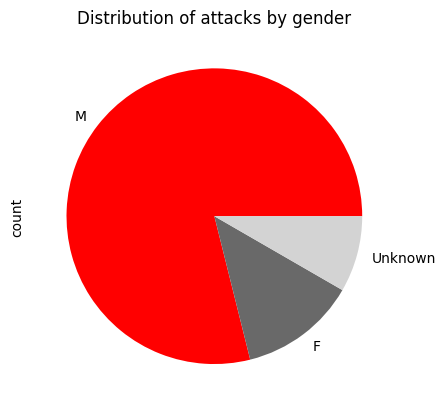

In [14]:
gender_distribution = sharks['sex_'].value_counts()

# I'm creating a variable that has the different categories inside the column "sex_" and the total amount of each

gender_distribution.plot(kind='pie', colors=['red', 'dimgray', 'lightgrey'])
# Using that variable I'm going to create a plot of "kind='pie'" and the colors ['red', 'dimgray', 'lightgrey']

plt.title('Distribution of attacks by gender')
# with this part I'm stablishing the name

plt.show()
# and here I'll show the graph

## Is the country related to the number of attacks?

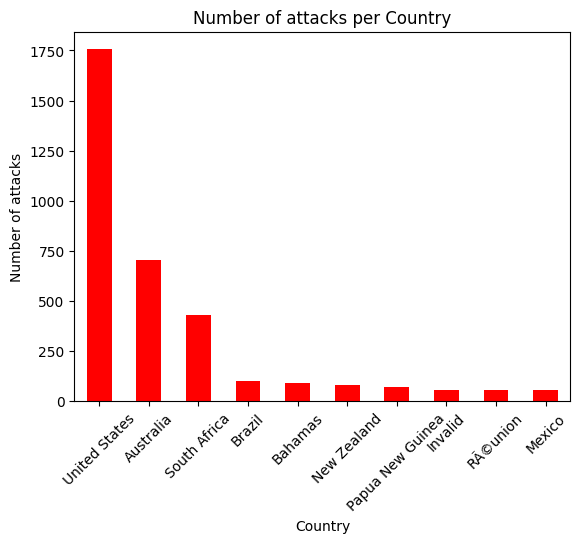

In [13]:
top_countries = sharks['country'].value_counts().head(10)
# in this variable I'm taking just the 10 countries with more values

top_countries.plot(kind='bar', color='red') # this time the type of graph will be 'bar'
plt.title('Number of attacks per Country')
plt.xlabel('Country') # The labels will give a name to each axis
plt.ylabel('Number of attacks')
plt.xticks(rotation=45) # Here I'm giving a rotation of 45 degrees to the different countries to prevent overwriting
plt.show()

## Is the activity related to the attack?

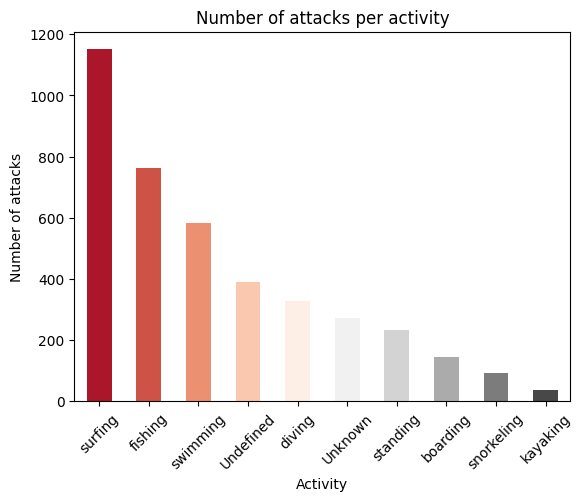

In [21]:
top_activities = sharks['activity'].value_counts().head(10)

colors = sns.color_palette("RdGy", n_colors=len(top_activities))
# this variable will give the colors to the 10 different activities, from Red to Grey

top_activities.plot(kind='bar', color=colors) # in color I'm passing the variable to adjust the colors
plt.title('Number of attacks per activity')
plt.xlabel('Activity')
plt.ylabel('Number of attacks')
plt.xticks(rotation=45)
plt.show()

### Is related the type of attack with the activity?

In [103]:
sharks.type.value_counts()

type
Unprovoked      3115
Provoked         367
Invalid          345
Sea accident     204
Name: count, dtype: int64

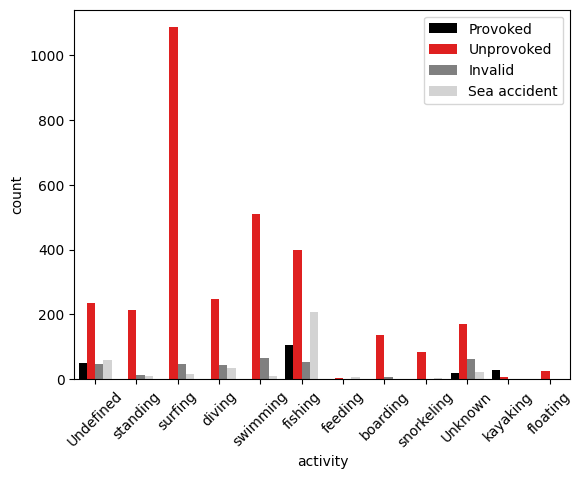

In [104]:
sns.countplot(x=sharks["activity"], hue=sharks["type"], palette=['black', 'red', 'grey', 'lightgrey'])
# In this king of graph I'm taking as an x-axis the column "Activity" 
# Introducing in the box in the up-right part of the graph the different values from the column "type"
# Finally palette associates each value to the hue with a color

plt.xticks(rotation=45)
plt.legend(labels=['Provoked', 'Unprovoked', 'Invalid', 'Sea accident'])
#The labels will give the name to the different results in the hue
plt.show()

### Is related the sex with the activity?

In [105]:
sharks.sex_.value_counts()

sex_
M          3182
F           515
Unknown     336
Name: count, dtype: int64

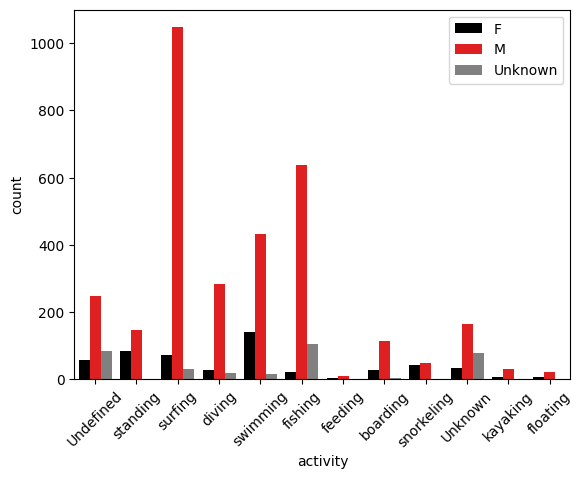

In [106]:
sns.countplot(x=sharks["activity"], hue=sharks["sex_"], palette=["black", "red", "grey"])
plt.xticks(rotation=45)
plt.legend(labels=['F', 'M', 'Unknown'])
plt.show()

### Is related the country and the activity with the number of attack?

In [107]:
top_activity = sharks['activity'].value_counts().head(3)

top_activity

activity
surfing     1151
fishing      764
swimming     584
Name: count, dtype: int64

In [108]:
sharks_activity_country = sharks[['activity', 'country']]

sharks_activity_country

,activity,country
0,Undefined,United States
1,standing,United States
2,surfing,United States
3,surfing,Australia
4,diving,Mexico
...,...,...
4028,fishing,Fiji
4029,fishing,Papua New Guinea
4030,fishing,Papua New Guinea
4031,swimming,Mozambique


In [24]:
top3_countries = sharks['country'].value_counts().head(3).index
top3_countries

Index(['United States', 'Australia', 'South Africa'], dtype='object', name='country')

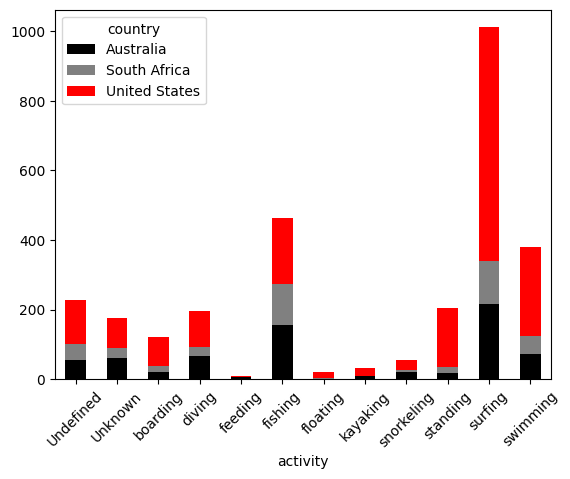

In [29]:
top3_countries = sharks['country'].value_counts().head(3).index
# this variable takes the three first values from the column 'country' and stablished them as the index

sharks_top3_countries = sharks[sharks['country'].isin(top3_countries)][['activity', 'country']]
# this variable is a new Data Frame that only will add the results that are in the top 3 countries in the columns activity and country 
# taking it from 'top3_countries' variable

sharks_top3_countries = pd.crosstab(sharks_top3_countries['activity'], sharks_top3_countries['country'])
# this part cross the column "Activity" from the new Data Frame "sharks_top3_countries" with the other column "country"
# and check the relation between them

sharks_top3_countries.plot(kind='bar', stacked=True, color=["black", "grey", "red"], rot=45);
# In this section the stacked=True, take the results from the different column and add them one over the other


## Is the type of attack related to the number of attacks?

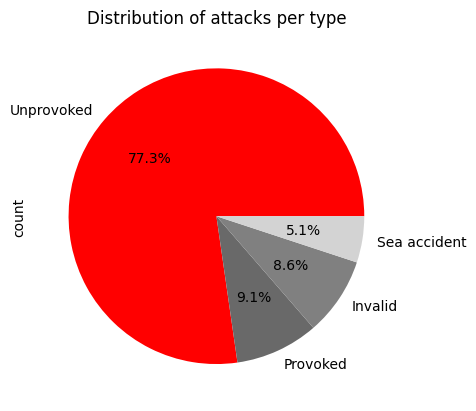

In [32]:
type_distribution = sharks['type'].value_counts()

type_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'dimgray', 'grey', 'lightgrey'])
# autopct add the percentages of each result to the graph
plt.title('Distribution of attacks per type')
plt.show()

## Evolution of number of attacks in the last thirty years

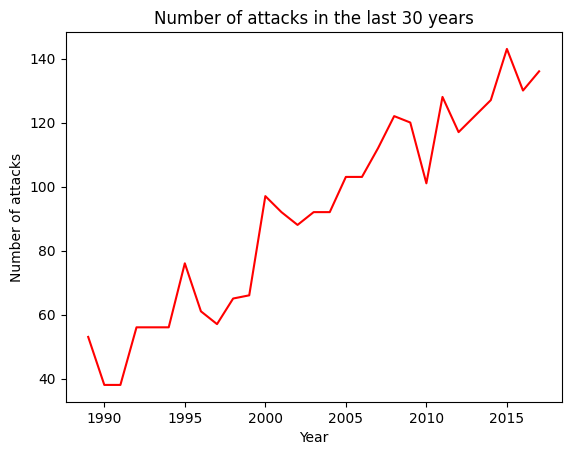

In [49]:
sharks_year = sharks[(sharks['year'] < 2018) & (sharks['year'] > 1988)]

sharks_year['year'].value_counts().sort_index().plot(kind='line', color='red')
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.title('Number of attacks in the last 30 years')
plt.show()
